# SPAIN ELECTRICITY SHORTFALL

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation.

We were task to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

In this project we are tasked to: 
 - model the shortfall between the energy generated by means of fossil fuels and various renewable sources for the country of Spain.  
 - Perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

The daily shortfall, which will be referred to as the target variable(y), which will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.(X)

In [101]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://storage.googleapis.com/kaggle-competitions/kaggle/36377/logos/header.png')


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Cleaning</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
In this section we will import the libraries that will be used throughout your analysis and modelling.

In [102]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import plotly.express as px
import math



# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

<a id="two"></a>
## 2. DATA CLEANING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section we loaded the data from the `df_train` and `df_test` file into a DataFrame and do some cleaning.


In [103]:
#load and read the train dataset
spain_train= pd.read_csv('df_train.csv', index_col=[0])
spain_test= pd.read_csv('df_test.csv', index_col=[0])

spain_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<p>From the cell above; we loaded our dataset(df_train.csv and df_test.csv) so we can take a good look at every features and observations</p> 

In [104]:
#Confirm the number of rows and coloumns in our train dataset
spain_train.shape

(8763, 48)

<p>There are <b>8,763</b> rows and <b>49</b> columns in our train dataset, let's take a look at he shape of our test dataset below.

In [105]:
#Confirm the number of rows and coloumns in our test dataset
spain_test.shape

(2920, 47)

<p>We can see the test data or unseen data has <b>2,920</b> and <b>48</b>. Now that we know the shape of our datasets, it's good pracice to get the information of every Feature present in our data as seen below. Now we will be working with the train data 

In [106]:
#get more information of our train dataset
spain_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

<p>we observed that Valencia Pressure is short of <b>2068</b> observations. we apply the .ISNULL().SUM() function to have a count of the missing values. Also we observed that the data types of valencia_wind_deg, time and seville_pressure are objects, we will normalize the columns in our modelling.

In [107]:
#count of missing values in our dataset
spain_train.isnull().sum().head()

time                   0
Madrid_wind_speed      0
Valencia_wind_deg      0
Bilbao_rain_1h         0
Valencia_wind_speed    0
dtype: int64

As observed earlier, valencia pressure has 2068 null values and will affect our exploration. we contemplated on removing the entire column if the null value is one third of the entire data set or replace the null values with NA or 0, but it is best practice to replace the missing observations with the mean of the column. 

In [108]:
# remove missing values/ features
spain_train['Valencia_pressure'].fillna(spain_train['Valencia_pressure'].median(), inplace = True)

Our Data is now clear of missing values. Now we can say our data is clean! 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, we will perform an in-depth analysis of all the variables in our DataFrame.


In [109]:
#get the 5 number summary of our train data
spain_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


C:\Users\SAMSON\AppData\Local\Temp/ipykernel_1248/1101788870.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

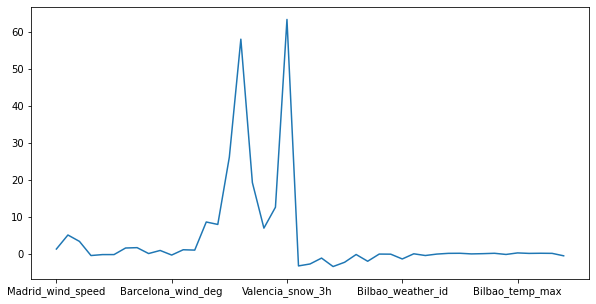

In [110]:
#plot the skewness of our train data
#to check how symmetrical our train data is
plt.figure(figsize = [10,5])
spain_train.skew(axis=0, skipna=True).plot()


In [111]:
#check for outliers
spain_train.kurtosis()

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_1248/2531507227.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          4.188187
Seville_temp_max          -0.515989
Madrid_pressure            2

<a id="four"></a>
## 4. Data Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---




In [112]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Seville_pressure'] = spain_train['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [113]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Valencia_wind_deg'] = spain_train['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

In [114]:
#changing time to date time 
spain_train['time'] = pd.to_datetime(spain_train['time'])

print(spain_train[0:1].time, spain_train[-1:].time)
print(spain_train['time'].dtypes)

0   2015-01-01 03:00:00
Name: time, dtype: datetime64[ns] 8762   2017-12-31 21:00:00
Name: time, dtype: datetime64[ns]
datetime64[ns]


In [115]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Year']  = spain_train['time'].astype('datetime64').dt.year
spain_train['Month_of_year']  = spain_train['time'].astype('datetime64').dt.month
spain_train['Day_of_month']  = spain_train['time'].astype('datetime64').dt.day
spain_train['Hour_of_day']  = spain_train['time'].astype('datetime64').dt.hour


In [116]:
spain_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month_of_year,Day_of_month,Hour_of_day
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


In [117]:
# engineer existing features
spain_train = spain_train.drop(columns=['Valencia_pressure','Seville_temp_max','Valencia_temp_max', 'Barcelona_temp_max', 
                                        'Madrid_temp_max', 'Bilbao_temp_max','Valencia_temp_min', 'Bilbao_temp_min', 
                                        'Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min','Year', 'Month_of_year', 'Day_of_month','time',
       'Hour_of_day'])

spain_train.shape

(8763, 36)

In [118]:
#confirming the columns in our train data
spain_train.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp',
       'load_shortfall_3h'],
      dtype='object')

In [119]:
#split data into X independent variable and Y dependent variable
X = spain_train.drop(columns = 'load_shortfall_3h')
y = spain_train['load_shortfall_3h'].astype('float64')



In [120]:
#data transformation
bestfeatures = SelectKBest(score_func=f_regression, k=10).fit_transform(X,y)
print(bestfeatures[:5])

[[  0.66666667   5.           0.          74.33333333  64.
  269.888      274.25466667 281.013      269.33861458 265.938     ]
 [  0.33333333  10.           0.          78.33333333  64.66666667
  271.72833333 274.945      280.56166667 270.376      266.38666667]
 [  1.           9.           0.          71.33333333  64.33333333
  278.00866667 278.792      281.58366667 275.02722917 272.70866667]
 [  1.           8.           0.          65.33333333  56.33333333
  284.89955208 285.394      283.43410417 281.1350625  281.89521875]
 [  1.           7.           0.          59.          57.
  283.01511458 285.51371875 284.21316667 282.2520625  280.6784375 ]]


In [121]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
    'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
    'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
    'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Bilbao_weather_id']]
X.shape

(8763, 28)

<AxesSubplot:>

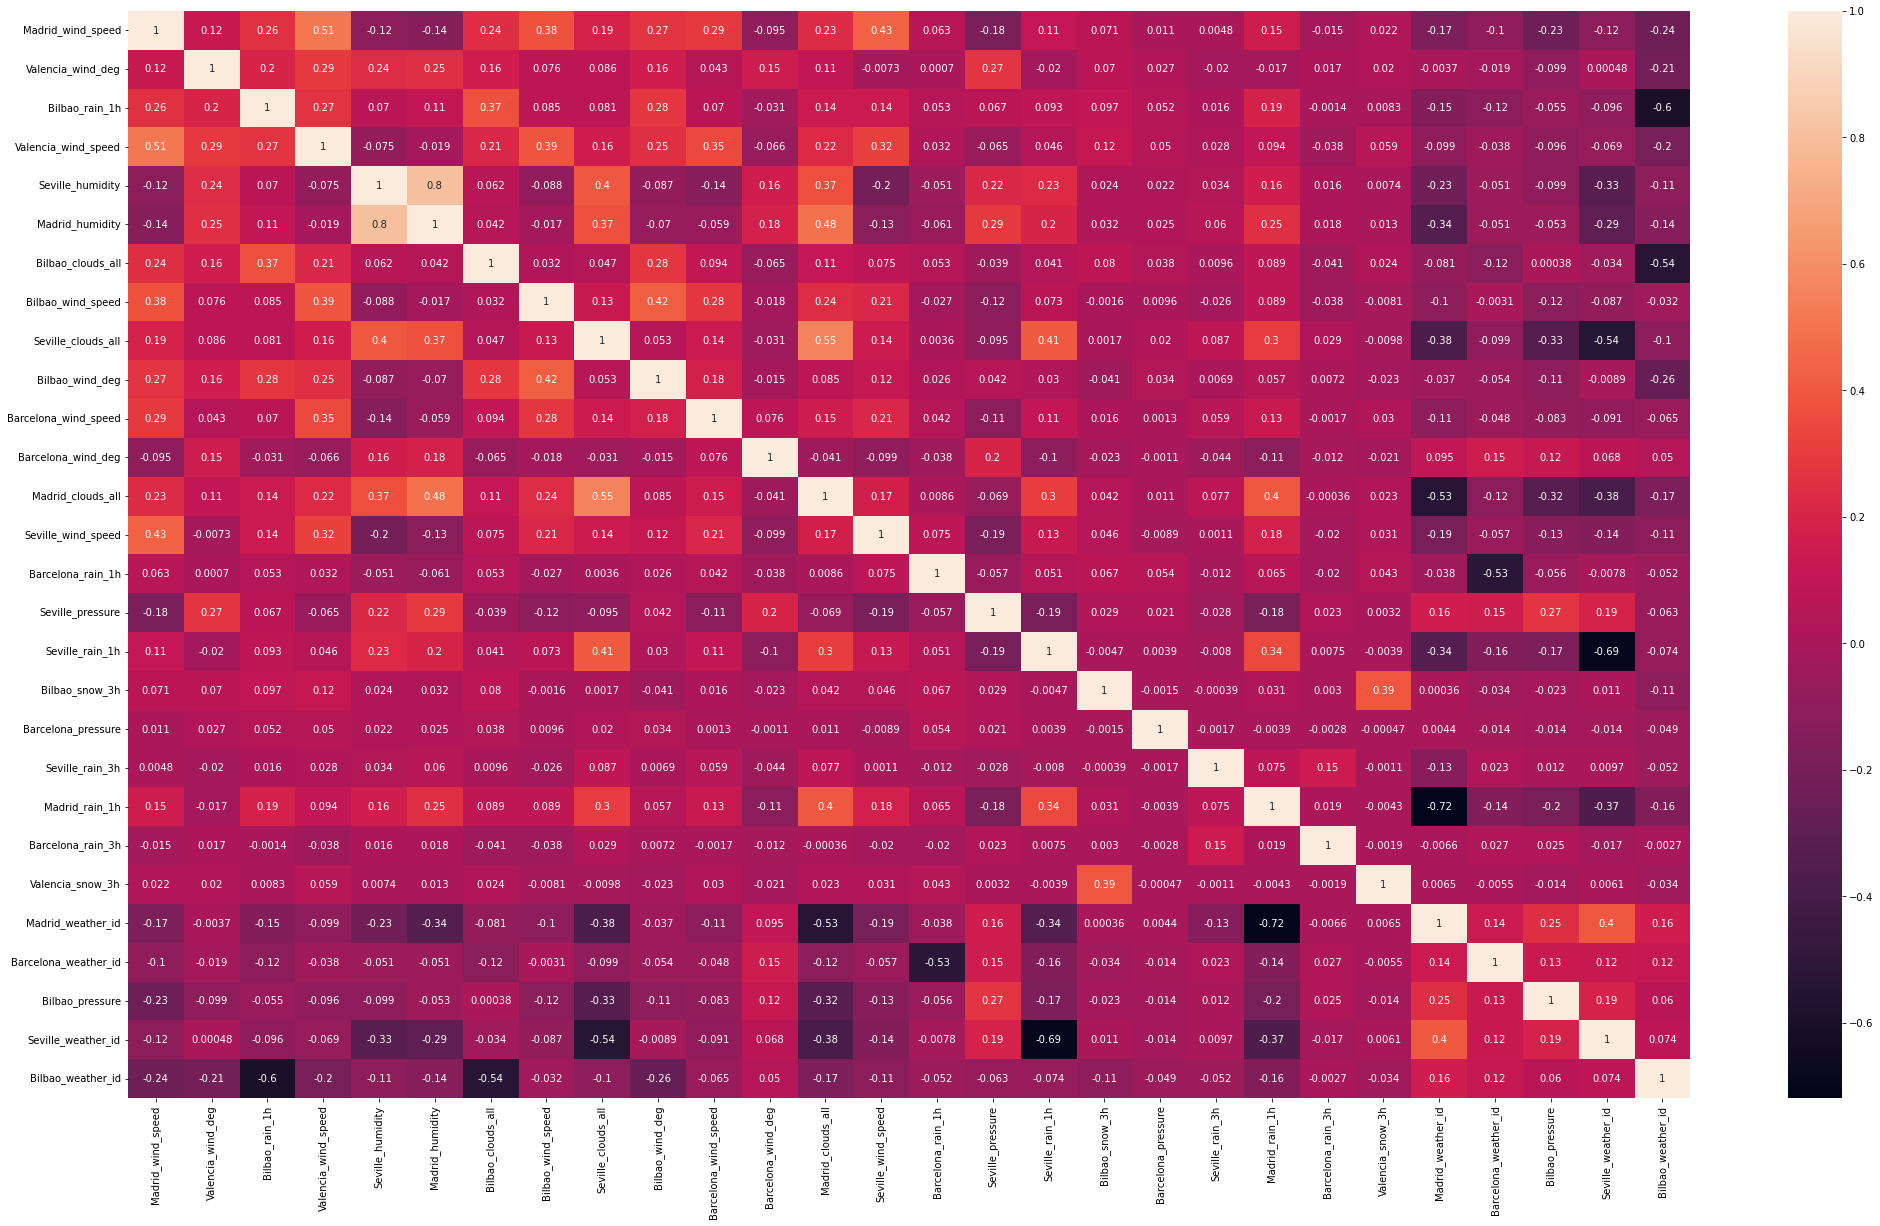

In [122]:
#Data correlation
#to see the relationship between our data
plt.figure(figsize=[35,20])
sns.heatmap(X.corr(),annot=True )

In [123]:

#insert our scaler function into a variable for easy access
scaler = StandardScaler()

In [124]:
#scale our data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.shape

(8763, 28)

In [125]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state = 42)

In [126]:
#Confirming the shape of our splitesd test, train data
print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)


Training predictor: (7010, 28)
Training target: (7010,)
Testing predictor: (1753, 28)
Testing target: (1753,)


In [127]:
#insert our linear regression model function into a variable
#create one or more ML models

lm = LinearRegression()

In [128]:
#then fit our data to the model
lm.fit(X_train, y_train)

LinearRegression()

In [129]:
#Modelling
predict = lm.predict(X_test)
train_predict = lm.predict(X_train)

In [130]:
#create one or more ML models
#insert model function into a variable and fit our data into the model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [131]:
#modelling
lasso_pred = lasso.predict(X_test)

In [132]:
#create one or more ML models
#insert model function into a variable and fit our data into the modelRidge = Ridge()
#Ridge.fit(X_train, y_train)

In [133]:
#modelling
#Ridge_pred = Ridge.predict(X_test)

In [134]:
#create one or more ML models
#insert model function into a variable and fit our data into the modelRidge = Ridge()

Sv_reg = SVR(kernel='rbf', gamma='auto') 
Sv_reg.fit(X_train,y_train)

SVR(gamma='auto')

In [135]:
#modelling
SV_pred = Sv_reg.predict(X_test)

In [136]:
#create one or more ML models
#insert model function into a variable and fit our data into the modelRidge = Ridge()

Reg_tree = DecisionTreeRegressor(random_state=42)
Reg_tree.fit(X_train,y_train)
ree_pred = Reg_tree.predict(X_test)

In [137]:
#create one or more ML models
#insert model function into a variable and fit our data into the modelRidge = Ridge()
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

In [138]:
import pickle

model_save_path = "mlr_RF.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RF,file)

In [139]:
# Compare model performance
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
#Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
#Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [140]:
#get result of actual and predicted variables
print(Linear.head()) 

            Actual     Predicted
1226  11450.666667  13071.563932
7903  13693.333333  11960.734040
1559  18337.333333  12952.434794
3621  -1221.000000   8687.802816
7552   8515.000000  13711.538204


In [141]:
#get result of actual and predicted variables
print(Lass_.head()) 

            Actual     Predicted
1226  11450.666667  13071.484722
7903  13693.333333  11960.745284
1559  18337.333333  12952.391097
3621  -1221.000000   8687.764549
7552   8515.000000  13711.471694


In [142]:
#get result of actual and predicted variables
#print(Ridge_.head()) 

In [143]:
#get result of actual and predicted variables
print(Sv_.head()) 

            Actual     Predicted
1226  11450.666667  11158.588038
7903  13693.333333  11068.874130
1559  18337.333333  11236.225846
3621  -1221.000000  10984.211608
7552   8515.000000  11234.689205


In [144]:
#get result of actual and predicted variables
print(Rand_.head()) 

            Actual     Predicted
1226  11450.666667  11125.503983
7903  13693.333333  11591.382379
1559  18337.333333  12883.927054
3621  -1221.000000   7786.080164
7552   8515.000000  12725.795467


###### Coefficient of determination (R2) measures the amount of variance in the predictions explained by the dataset.
It is the difference between the samples in the dataset and the predictions made by the model.
It is measure from zero to one with one representing a perfect model and zero showing that the model will perform badly on unseen data.
RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values.
It measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
The smaller the RMSE of the model the better.

In [145]:
#get the performance of our train model
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        #"Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                        "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        #"Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance


,Test RMSE
Lasso,5026.539943
Linear model,5026.540084
Random Forest,4791.828666
SVR,5297.333198


######   Choosen method's logic:
Initially we started building our model using linear regression.
However a linear model is not appropriate for data that is not linear, it also suffers from multi-colinearity.
Lasso regression helps in reducing overfitting but and in feature selection by setting coefficients with high values to zero.
Random forests address the problem of overfitting.
They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the mean of the classes as the prediction of all the trees.

In [146]:
#plot a graph of our model performance

px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

In [147]:
#get the performance of our train model
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        #"Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                        "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        #"Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }


Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

,Test MAE
Lasso,4015.126922
Linear model,4015.126623
Random Forest,3810.115020
SVR,4229.855134


In [148]:
#plot a graph of our model performance
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)

##### From all of these Results, we will choose Random Forest for our model Predictions as it meets all the expectations for a regression model and gives better performing metric
Random Forest has a higher R2 for Test data as compared to the other models.
Random Forest again has a lower RMSE for both the Training and Test data as compared to the other models.
We can therefore conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain

In [149]:
#get the performance of our train model
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        #"Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                        "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        #"Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}}

Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
Lasso,0.102858
Linear model,0.102858
Random Forest,0.184685
SVR,0.003592


In [150]:
#plot a graph of our model performance
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

## FEATURE ENGINEERING ON Our Test Dataset

In [151]:
#spliting and conversion of test dataset 'time' into year,month,day, and hour
spain_test['Year']  = spain_test['time'].astype('datetime64').dt.year
spain_test['Month_of_year']  = spain_test['time'].astype('datetime64').dt.month
spain_test['Day_of_month']  = spain_test['time'].astype('datetime64').dt.day
spain_test['Hour_of_day']  = spain_test['time'].astype('datetime64').dt.hour


In [152]:
#isolating time column 
time = spain_test['time']

In [153]:
#extract and convert object variables of our test dataset
spain_test['Valencia_wind_deg'] = spain_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
spain_test['Seville_pressure'] = spain_test['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [154]:
#get outliers in test dataset
spain_test.kurtosis()

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_1248/1197313169.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Madrid_wind_speed          2.567383
Valencia_wind_deg         -1.142026
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_pressure          -1.001501
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4

In [155]:
#changing time to date time 
spain_test['time'] = pd.to_datetime(spain_test['time'])

print(spain_test[0:1].time, spain_test[-1:].time)
print(spain_test['time'].dtypes)

8763   2018-01-01
Name: time, dtype: datetime64[ns] 11682   2018-12-31 21:00:00
Name: time, dtype: datetime64[ns]
datetime64[ns]


In [156]:
# engineer existing features
spain_test = spain_test.drop(columns=['Valencia_pressure','Seville_temp_max','Valencia_temp_max', 'Barcelona_temp_max', 
                                        'Madrid_temp_max', 'Bilbao_temp_max','Valencia_temp_min', 'Bilbao_temp_min', 
                                        'Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min'])

spain_test.shape

(2920, 40)

In [157]:
#confirm columns in our test dataset
spain_test = spain_test[['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp']]
spain_test.shape

(2920, 36)

In [158]:
#time = spain_test['time']

In [163]:
#predicting using the unseen data
#spain_test['load_shortfall_3h'] = RF.predict(spain_test)

In [162]:
#create a table of time and predicted unseen data and saving to csv
#spain_test['time'] = time
#load = spain_test[['time','load_shortfall_3h']]
#load.to_csv('submission_predict.csv', index = False)
#load
